In [1]:
!nvidia-smi

Fri May 10 13:42:57 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P8              13W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [15]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [12]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.1/78.2 GB disk)


In [16]:
from ultralytics import YOLO

from IPython.display import display, Image

In [1]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="3scUVG859M92plBfEttr")
project = rf.workspace("minhdv-busxt").project("test-scoring-detection")
version = project.version(1)
dataset = version.download("yolov8")


mkdir: cannot create directory ‘{HOME}/datasets’: No such file or directory
[Errno 2] No such file or directory: '{HOME}/datasets'
/content
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to test-scoring-detection-1 in yolov8:: 100%|██████████| 564/564 [00:00<00:00, 7963.25it/s]


In [6]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

## Custom Training

In [2]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

[Errno 2] No such file or directory: '{HOME}'
/content
New https://pypi.org/project/ultralytics/8.2.11 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/test-scoring-detection-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, s

In [9]:
!ls {HOME}/runs/detect/train/

args.yaml					    P_curve.png       train_batch210.jpg
confusion_matrix_normalized.png			    PR_curve.png      train_batch211.jpg
confusion_matrix.png				    R_curve.png       train_batch212.jpg
events.out.tfevents.1715348815.98d62b5c1269.1672.0  results.csv       train_batch2.jpg
F1_curve.png					    results.png       val_batch0_labels.jpg
labels_correlogram.jpg				    train_batch0.jpg  val_batch0_pred.jpg
labels.jpg					    train_batch1.jpg  weights


/content


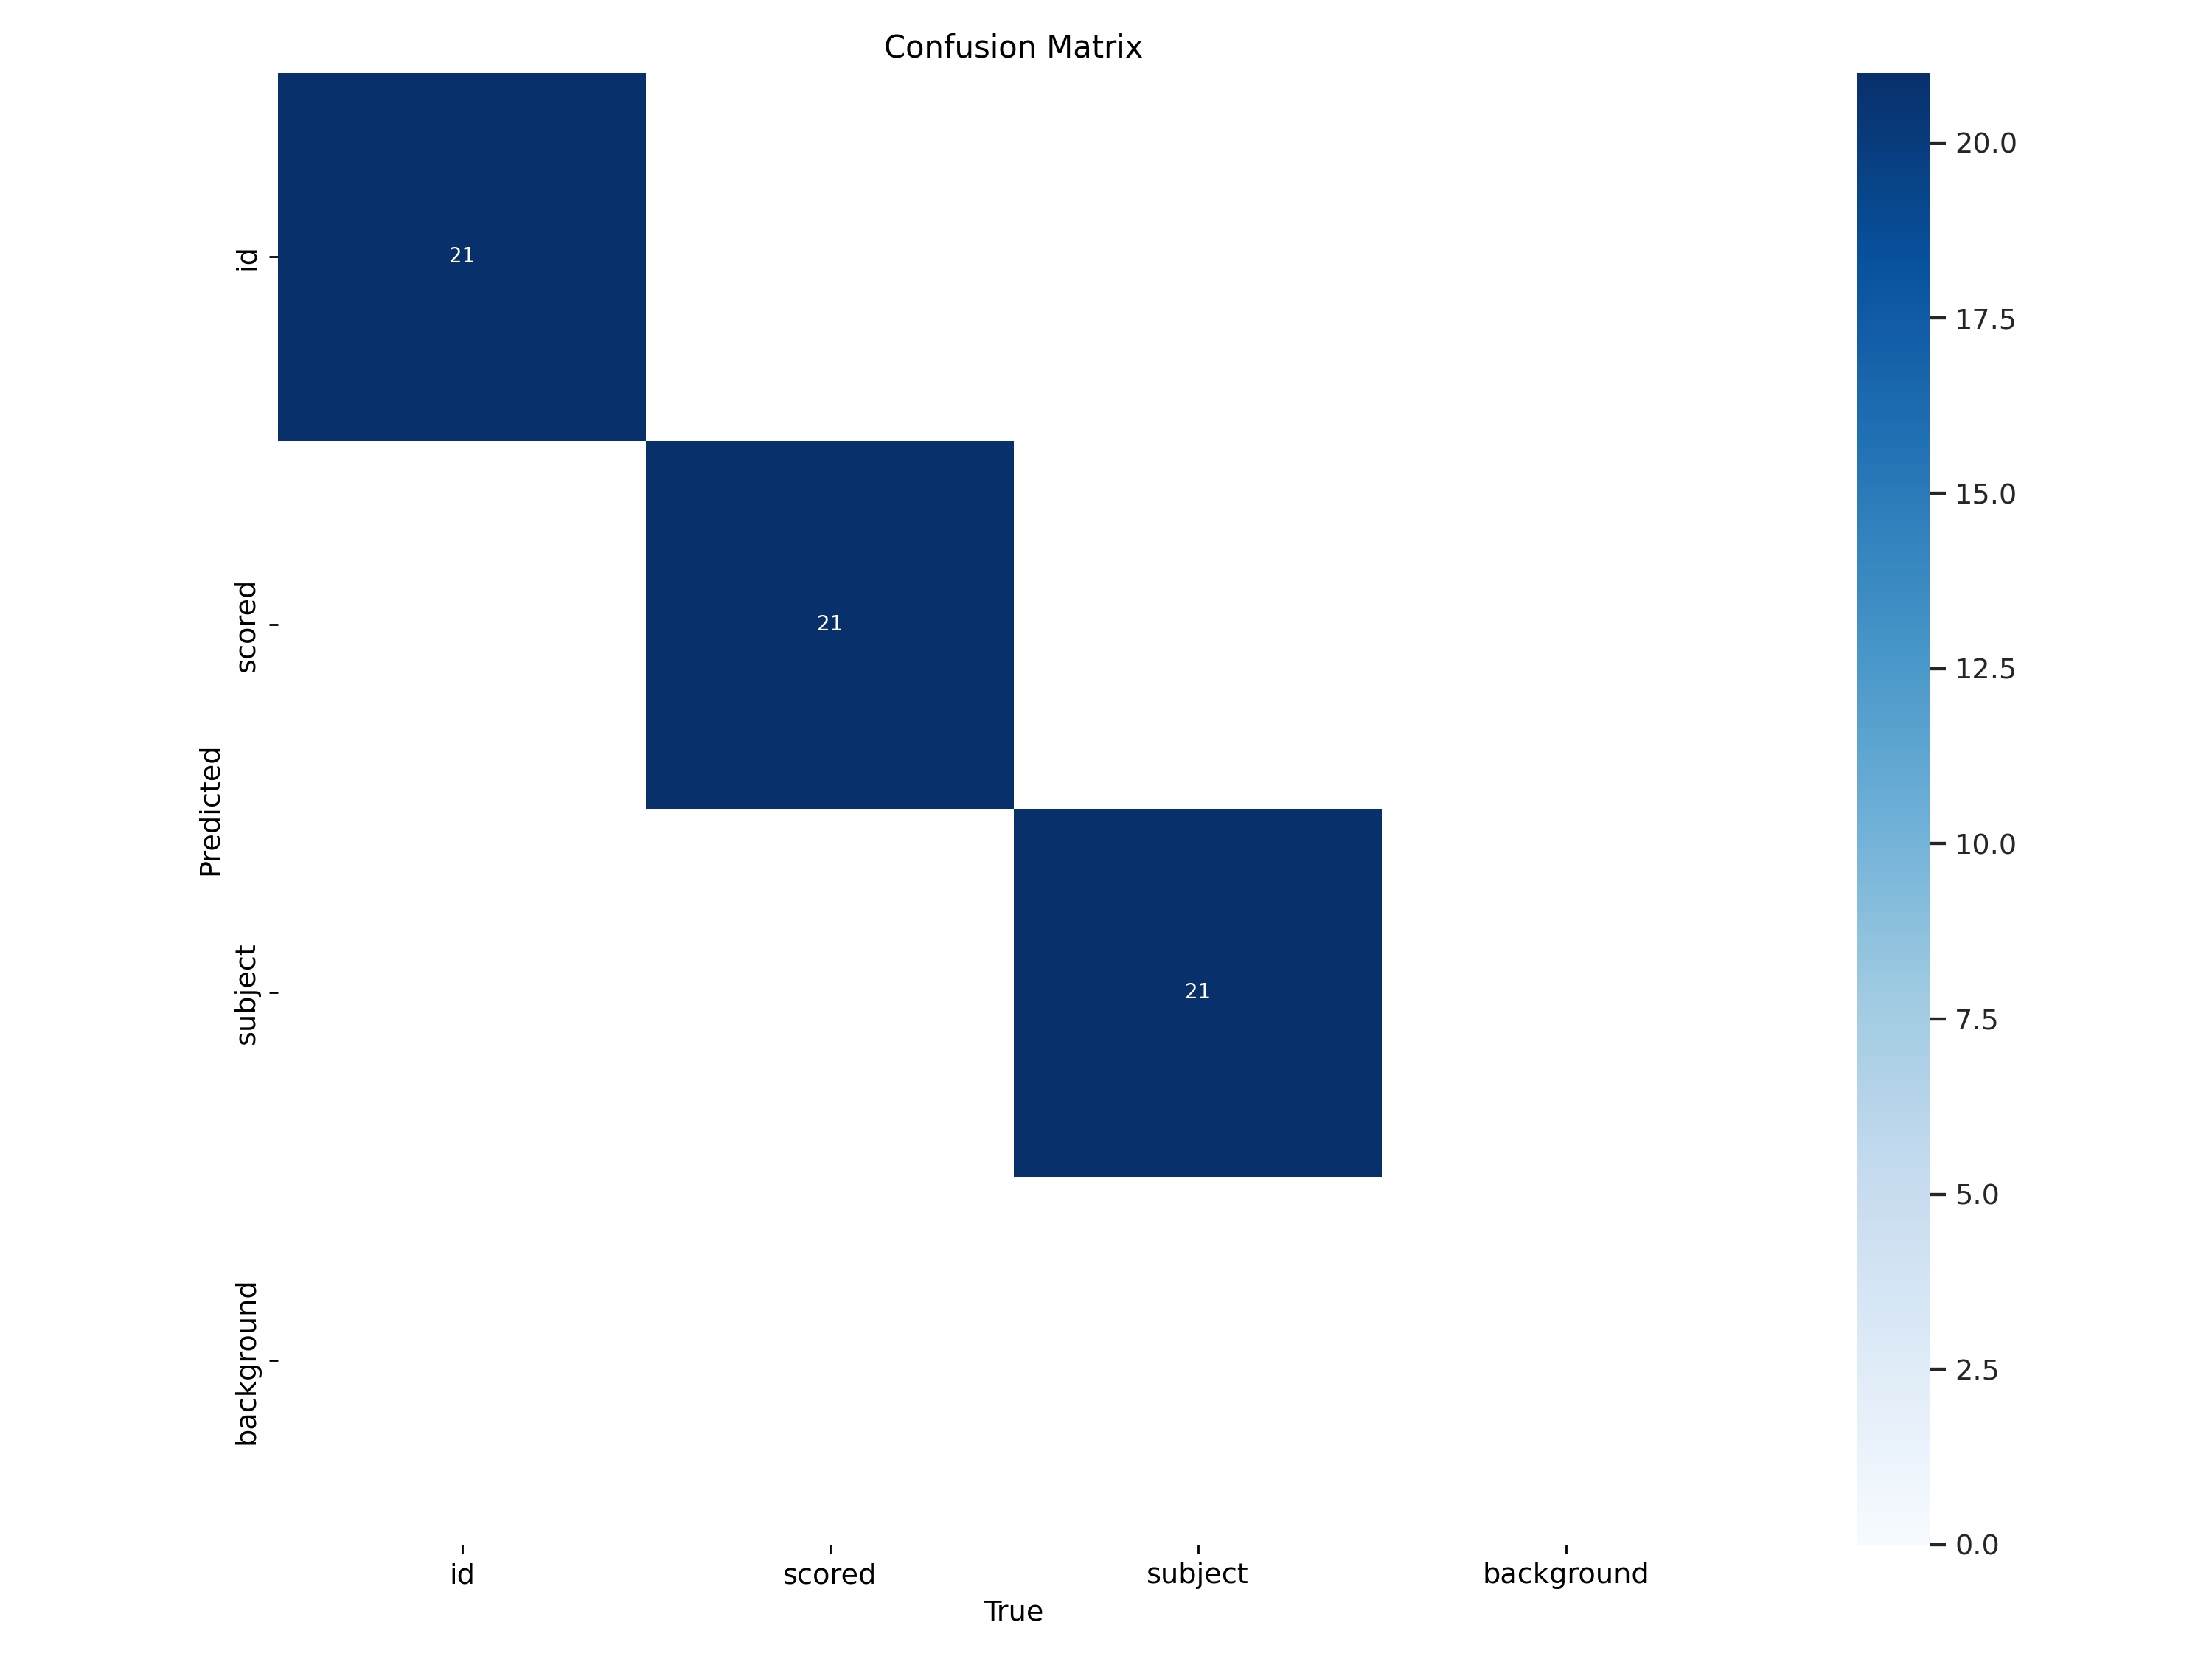

In [17]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


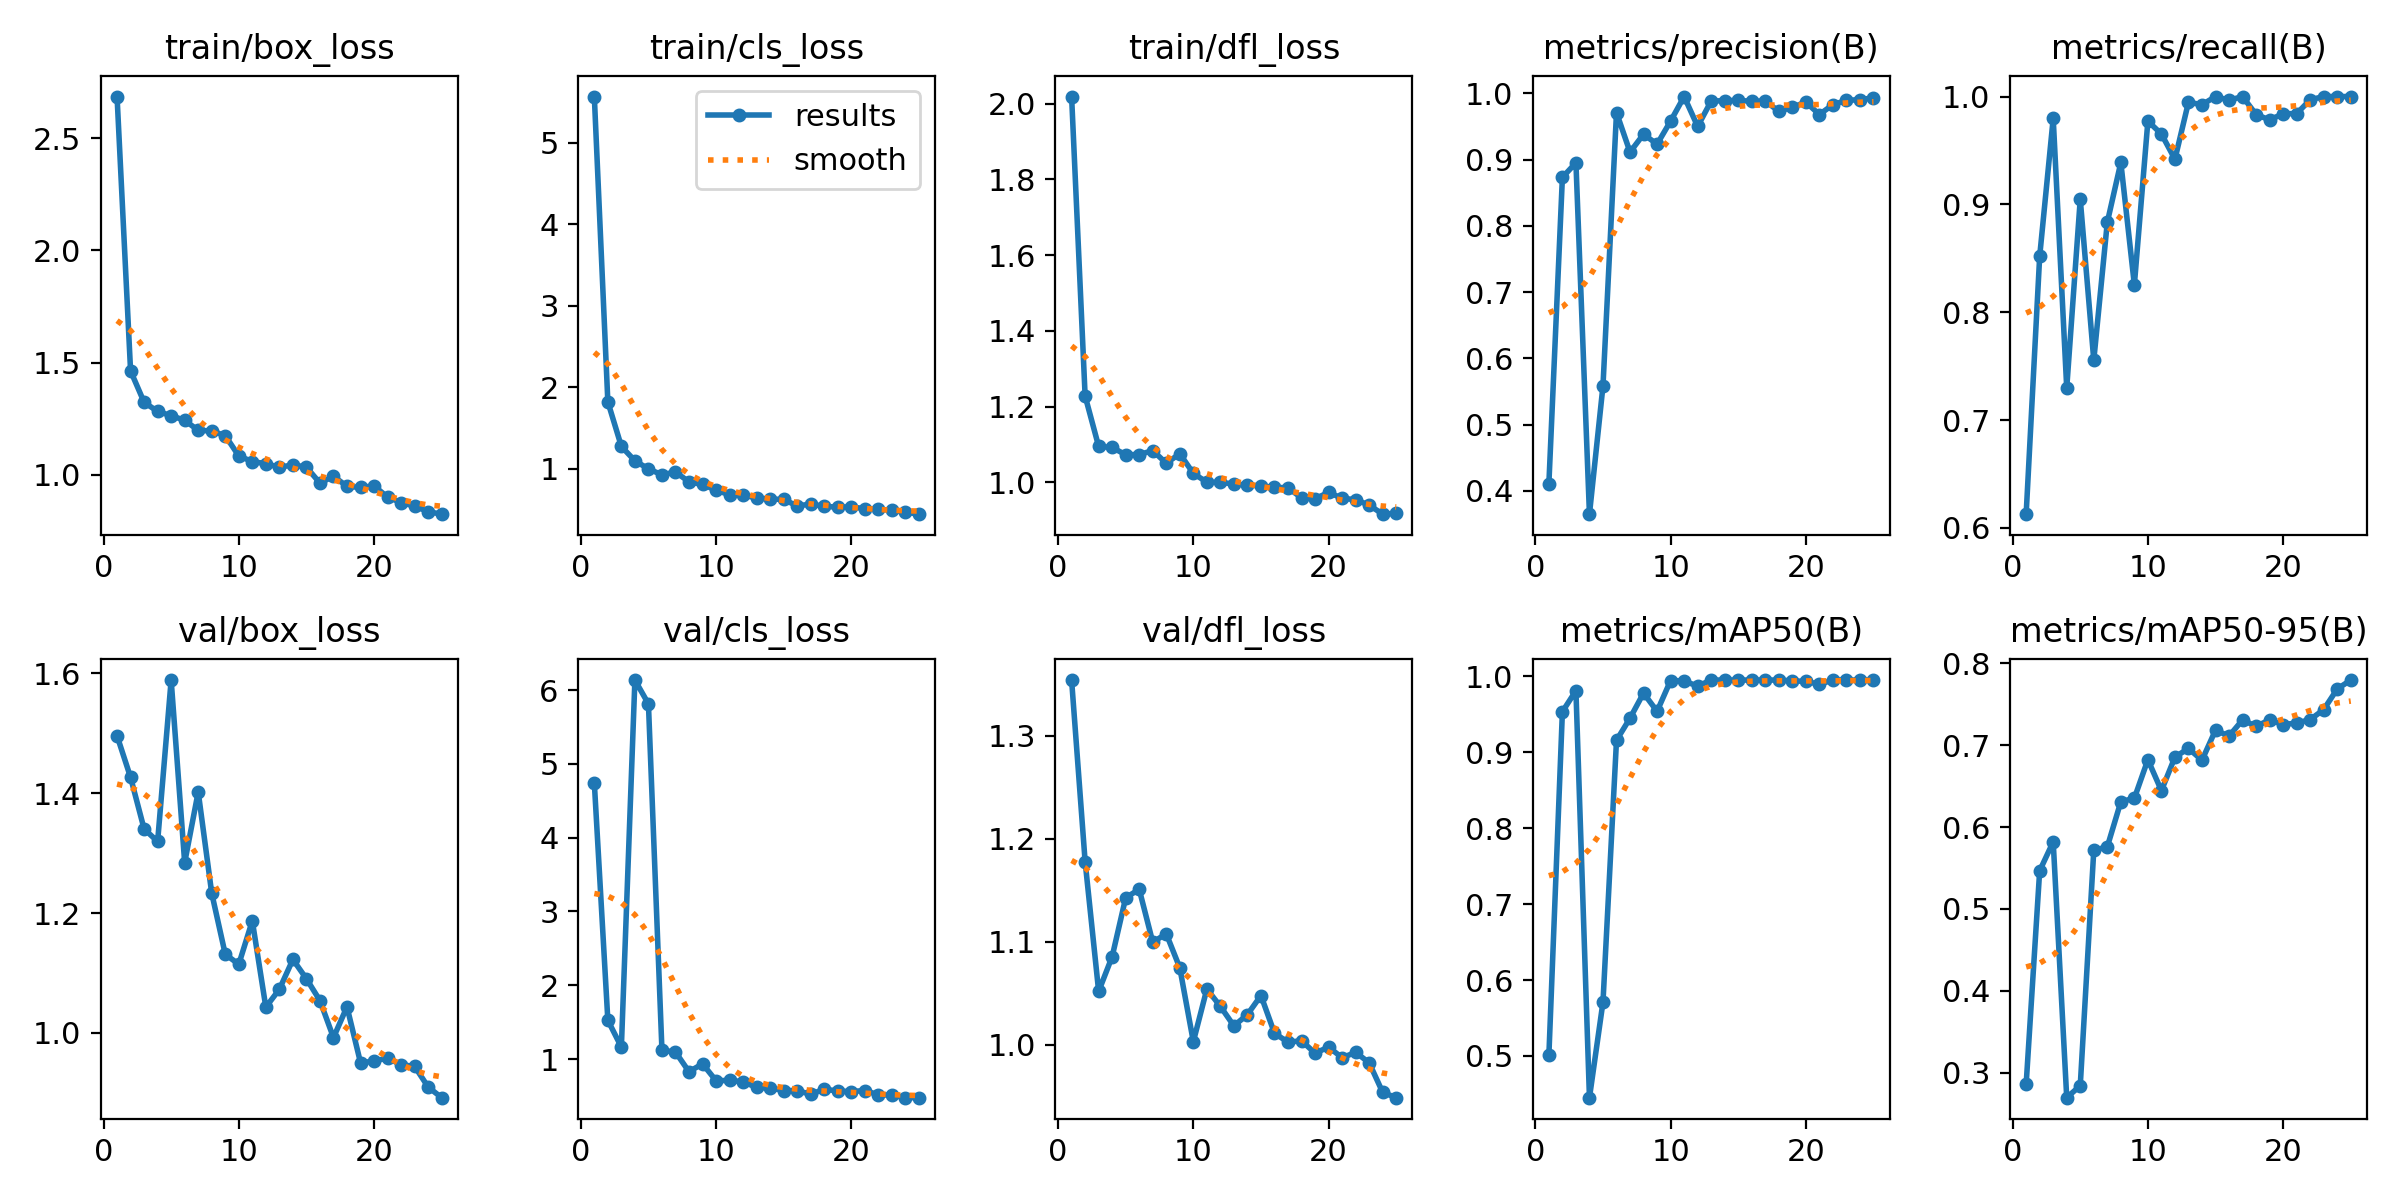

In [18]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


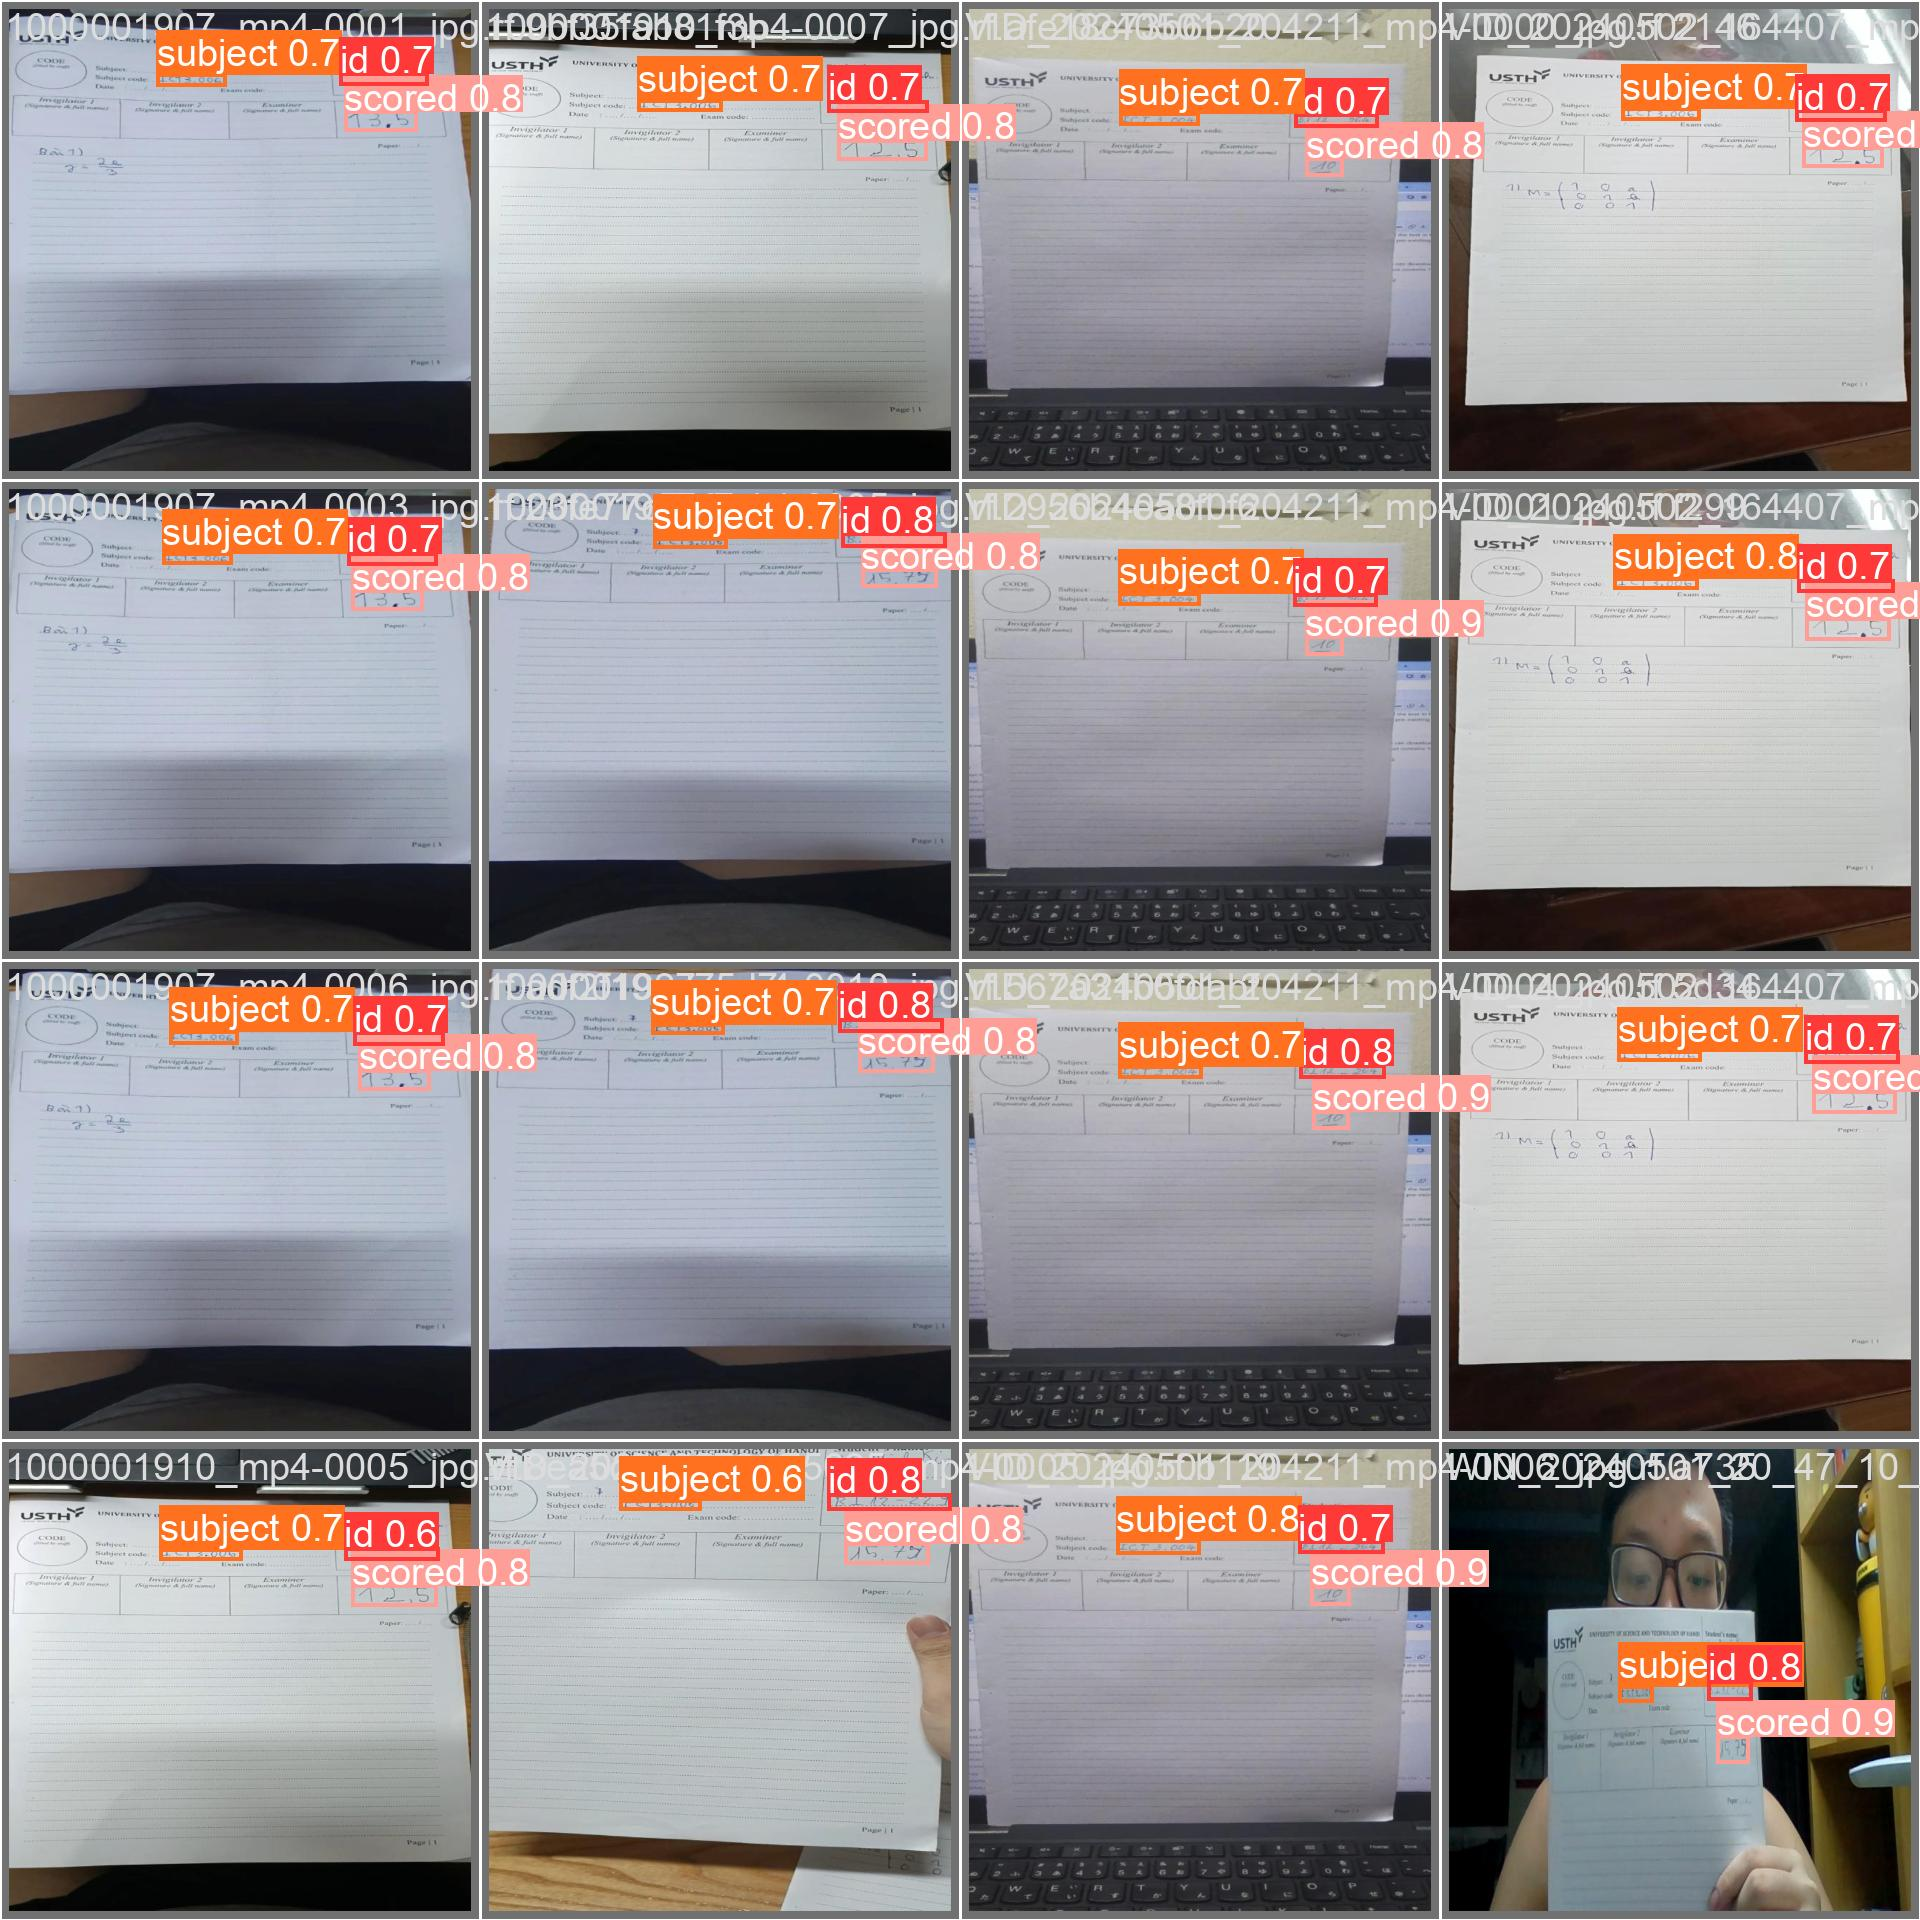

In [19]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [20]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/test-scoring-detection-1/valid/labels.cache... 21 images, 0 backgrounds, 0 corrupt: 100% 21/21 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.08it/s]
                   all         21         63      0.993          1      0.995      0.777
                    id         21         21      0.996          1      0.995      0.738
                scored         21         21      0.988          1      0.995      0.791
               subject         21         21      0.995         

## Inference with Custom Model

In [25]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/38 /content/test-scoring-detection-1/test/images/1000001908_jpg.rf.e5544ae480389f238825740385855554.jpg: 800x800 1 id, 1 scored, 1 subject, 25.3ms
image 2/38 /content/test-scoring-detection-1/test/images/1000001909_jpg.rf.81eedc71e9a8520be01440a48f0aeeda.jpg: 800x800 1 id, 1 scored, 1 subject, 22.5ms
image 3/38 /content/test-scoring-detection-1/test/images/1000001910_mp4-0003_jpg.rf.397a867263b244238a3ff363ee09504a.jpg: 800x800 1 id, 1 scored, 1 subject, 22.4ms
image 4/38 /content/test-scoring-detection-1/test/images/1000001911_jpg.rf.bbf61dc6903ae6ef8cd22e444e889ca4.jpg: 800x800 1 id, 1 scored, 1 subject, 22.4ms
image 5/38 /content/test-scoring-detection-1/test/images/1000001912_jpg.rf.54ec8bd9a3e1021da9c0b05116f3c2ae.jpg: 800x800 1 id, 1 scored, 1 subject, 22

**NOTE:** Let's take a look at few results.

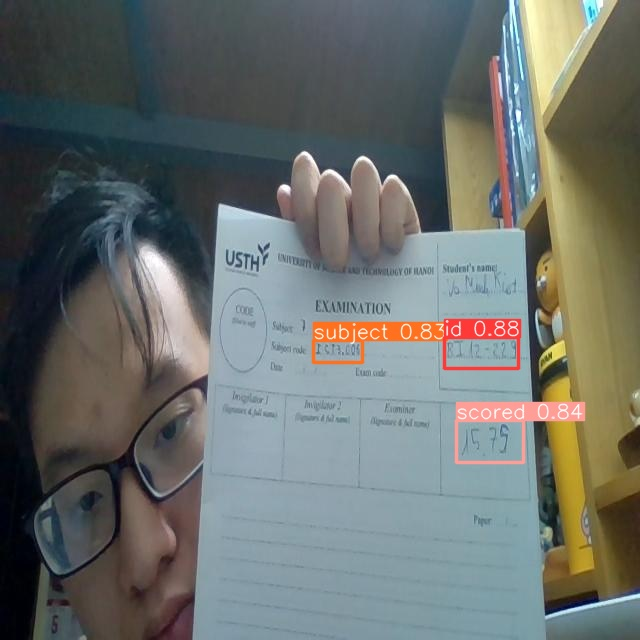

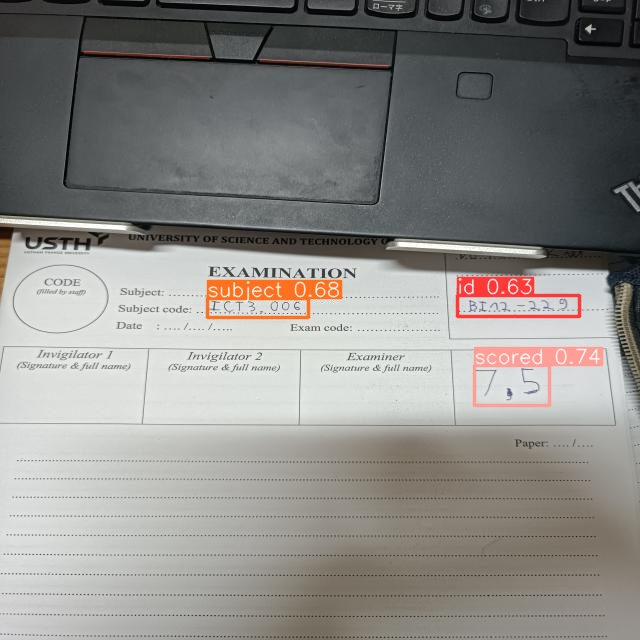

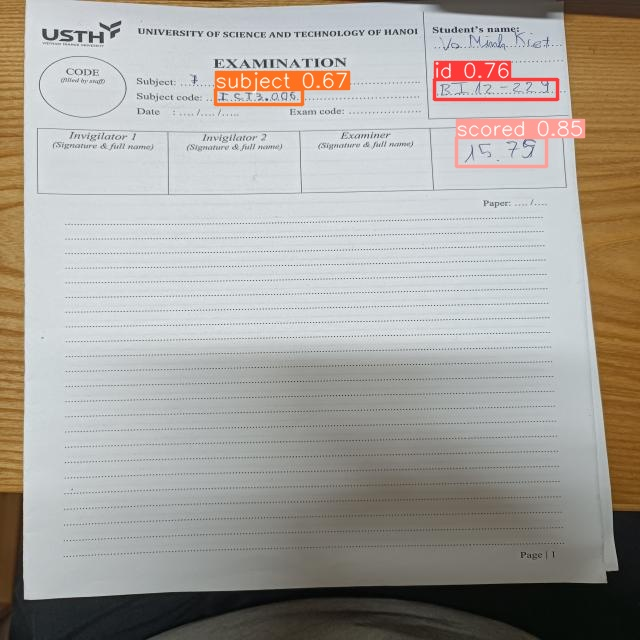

In [26]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict2/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [32]:
!zip -r /content/content.zip /content

  adding: content/ (stored 0%)
  adding: content/.config/ (stored 0%)
  adding: content/.config/logs/ (stored 0%)
  adding: content/.config/logs/2024.05.08/ (stored 0%)
  adding: content/.config/logs/2024.05.08/21.21.15.876371.log (deflated 58%)
  adding: content/.config/logs/2024.05.08/21.21.27.834436.log (deflated 56%)
  adding: content/.config/logs/2024.05.08/21.20.55.349362.log (deflated 58%)
  adding: content/.config/logs/2024.05.08/21.20.28.715703.log (deflated 91%)
  adding: content/.config/logs/2024.05.08/21.21.27.227927.log (deflated 57%)
  adding: content/.config/logs/2024.05.08/21.21.06.446785.log (deflated 86%)
  adding: content/.config/configurations/ (stored 0%)
  adding: content/.config/configurations/config_default (deflated 15%)
  adding: content/.config/.last_update_check.json (deflated 22%)
  adding: content/.config/config_sentinel (stored 0%)
  adding: content/.config/default_configs.db (deflated 98%)
  adding: content/.config/.last_survey_prompt.yaml (stored 0%)
  

In [31]:
from google.colab import files
files.download("/content.zip")


FileNotFoundError: Cannot find file: /content.zip